In [1]:
import numpy as np
import pandas as pd

import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt

sc.set_figure_params(dpi=200,figsize=(6,4),fontsize=10,frameon=False)

# Multiome

In [3]:
#Loading data
adata_gex = ad.read_h5ad("./data/single_cell_data/multiome_gex_processed_training.h5ad")
adata_gex

AnnData object with n_obs × n_vars = 22463 × 13431
    obs: 'n_genes_by_counts', 'pct_counts_mt', 'n_counts', 'n_genes', 'size_factors', 'phase', 'cell_type', 'pseudotime_order_GEX', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'dataset_id', 'organism'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts', 'log_norm'

/home/icb/hananeh.aliee/miniconda3/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/icb/hananeh.aliee/miniconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


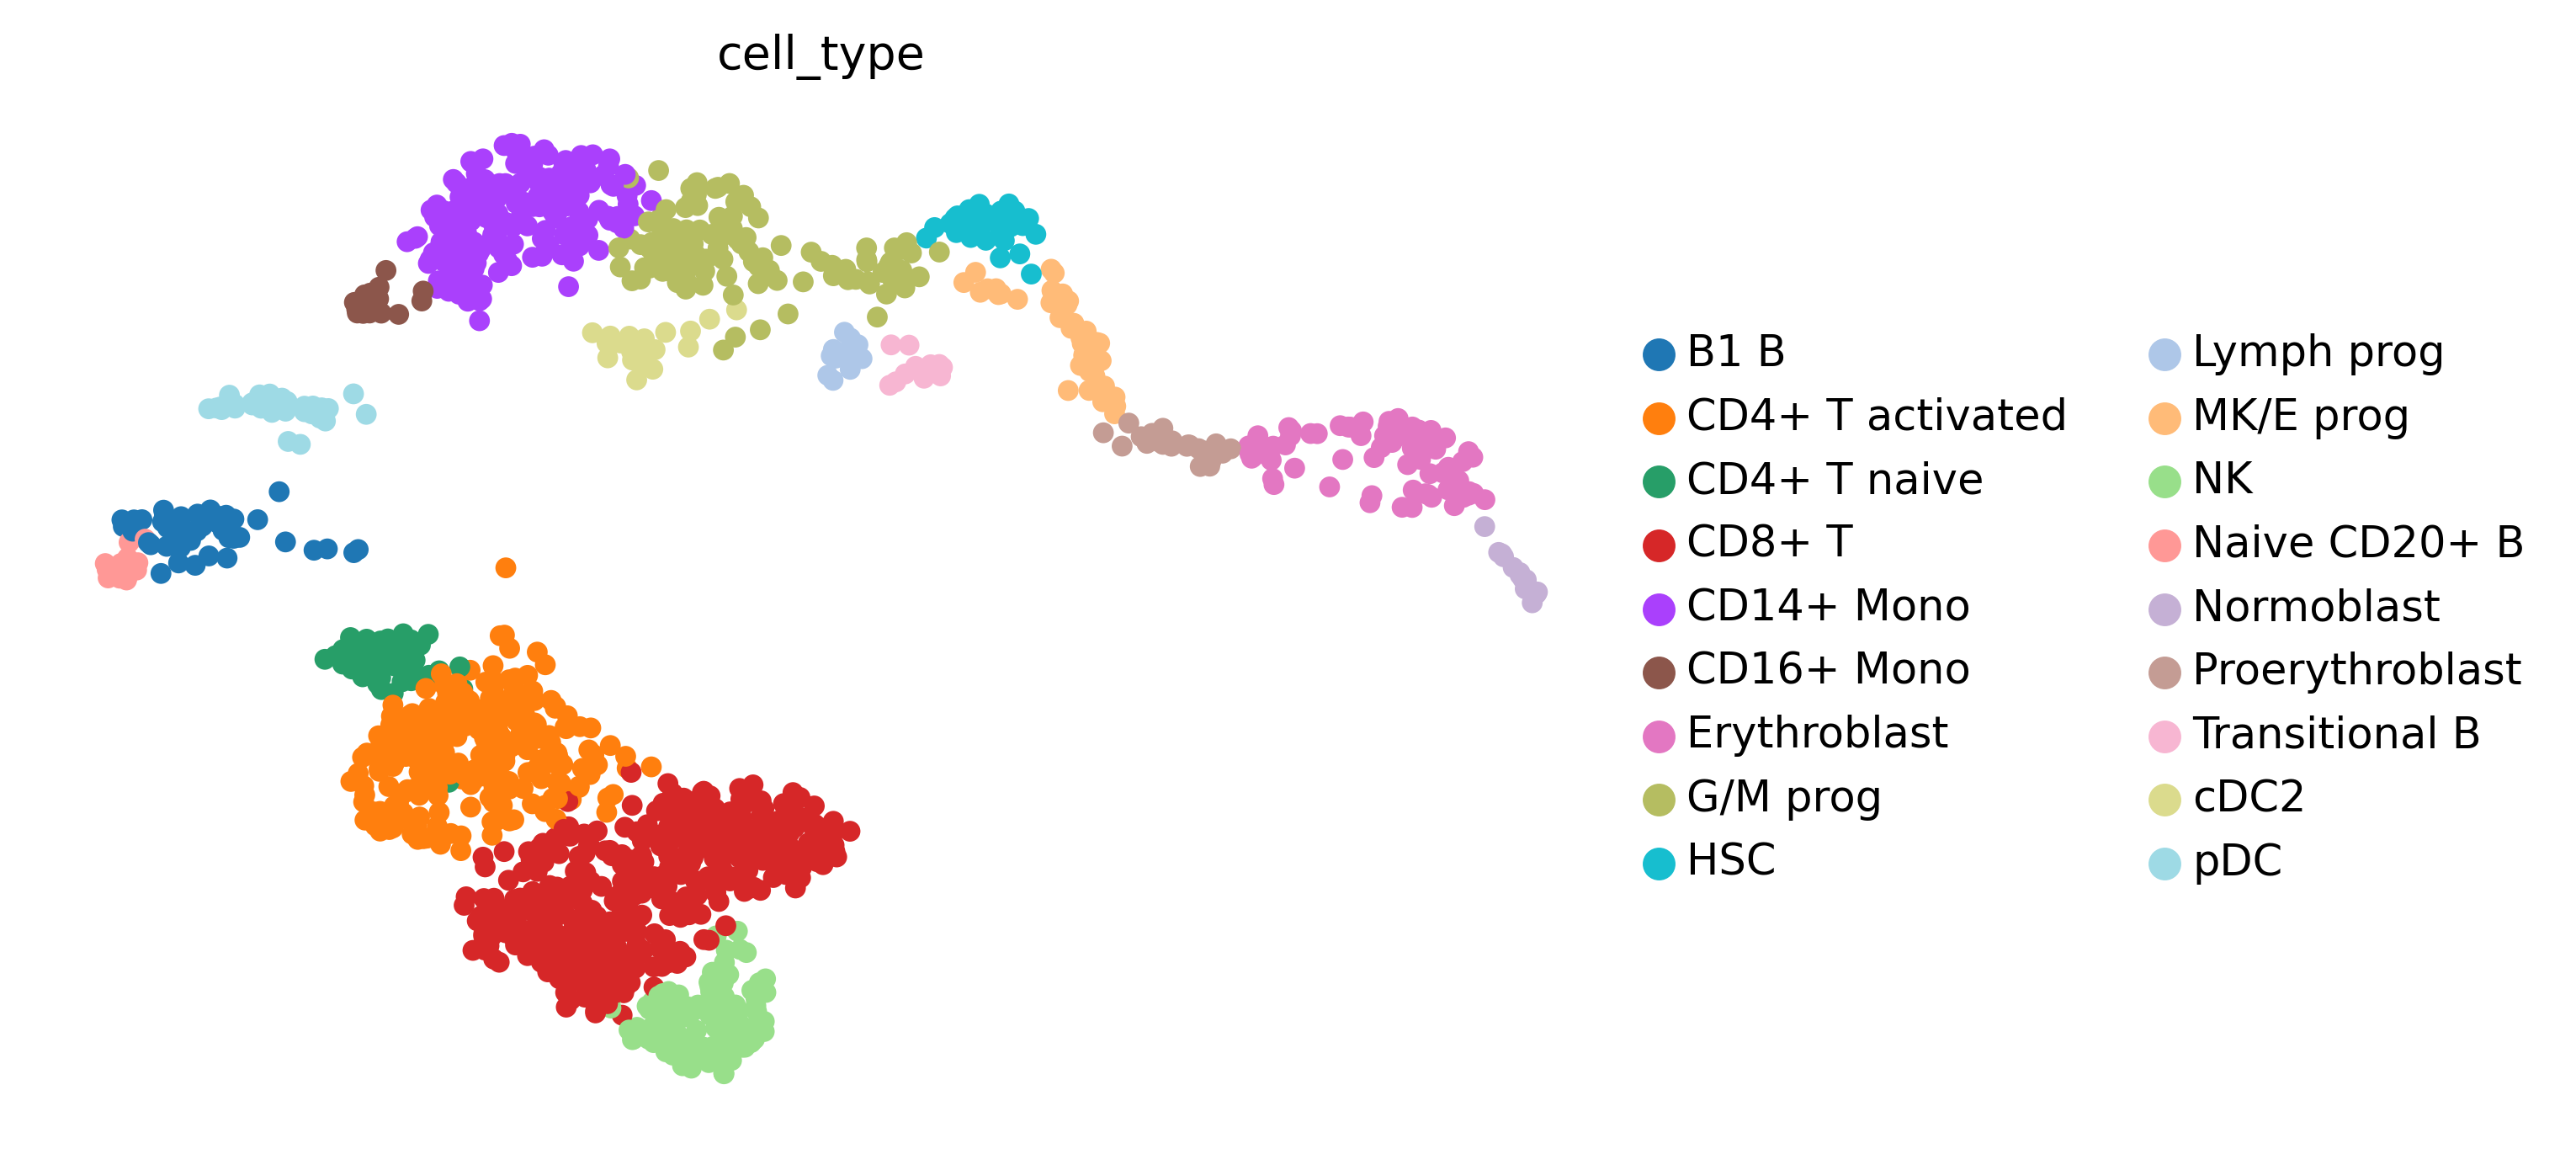

In [4]:
#UMAP visualisation of batch=s3d6
sc.pl.umap(adata_gex[adata_gex.obs.batch=='s3d6'],color = 'cell_type')

# Lineage inference

In [5]:
#subsetting batches
adata_gex11 = adata_gex[adata_gex.obs.batch=='s1d1'].copy()
adata_gex12 = adata_gex[adata_gex.obs.batch=='s1d2'].copy()
adata_gex21 = adata_gex[adata_gex.obs.batch=='s2d1'].copy()
adata_gex24 = adata_gex[adata_gex.obs.batch=='s2d4'].copy()
adata_gex36 = adata_gex[adata_gex.obs.batch=='s3d6'].copy()

In [6]:
#Performing diffusion map on each batch individually to learn pseudo order of the cells
sc.pp.neighbors(adata_gex11,n_neighbors=30)
sc.tl.diffmap(adata_gex11, n_comps=20)

adata_gex11.uns['iroot'] = np.flatnonzero(adata_gex11.obs['cell_type'] == 'HSC')[0]
sc.tl.dpt(adata_gex11, n_dcs=10)

In [7]:
sc.pp.neighbors(adata_gex12,n_neighbors=30)
sc.tl.diffmap(adata_gex12, n_comps=20)

adata_gex12.uns['iroot'] = np.flatnonzero(adata_gex12.obs['cell_type'] == 'HSC')[0]
sc.tl.dpt(adata_gex12, n_dcs=10)

In [8]:
sc.pp.neighbors(adata_gex21,n_neighbors=30)
sc.tl.diffmap(adata_gex21, n_comps=20)

adata_gex21.uns['iroot'] = np.flatnonzero(adata_gex21.obs['cell_type'] == 'HSC')[0]
sc.tl.dpt(adata_gex21, n_dcs=10)

In [9]:
sc.pp.neighbors(adata_gex24,n_neighbors=30)
sc.tl.diffmap(adata_gex24, n_comps=20)

adata_gex24.uns['iroot'] = np.flatnonzero(adata_gex24.obs['cell_type'] == 'HSC')[0]
sc.tl.dpt(adata_gex24, n_dcs=10)

In [10]:
sc.pp.neighbors(adata_gex36,n_neighbors=30)
sc.tl.diffmap(adata_gex36, n_comps=20)

adata_gex36.uns['iroot'] = np.flatnonzero(adata_gex36.obs['cell_type'] == 'HSC')[0]
sc.tl.dpt(adata_gex36, n_dcs=10)

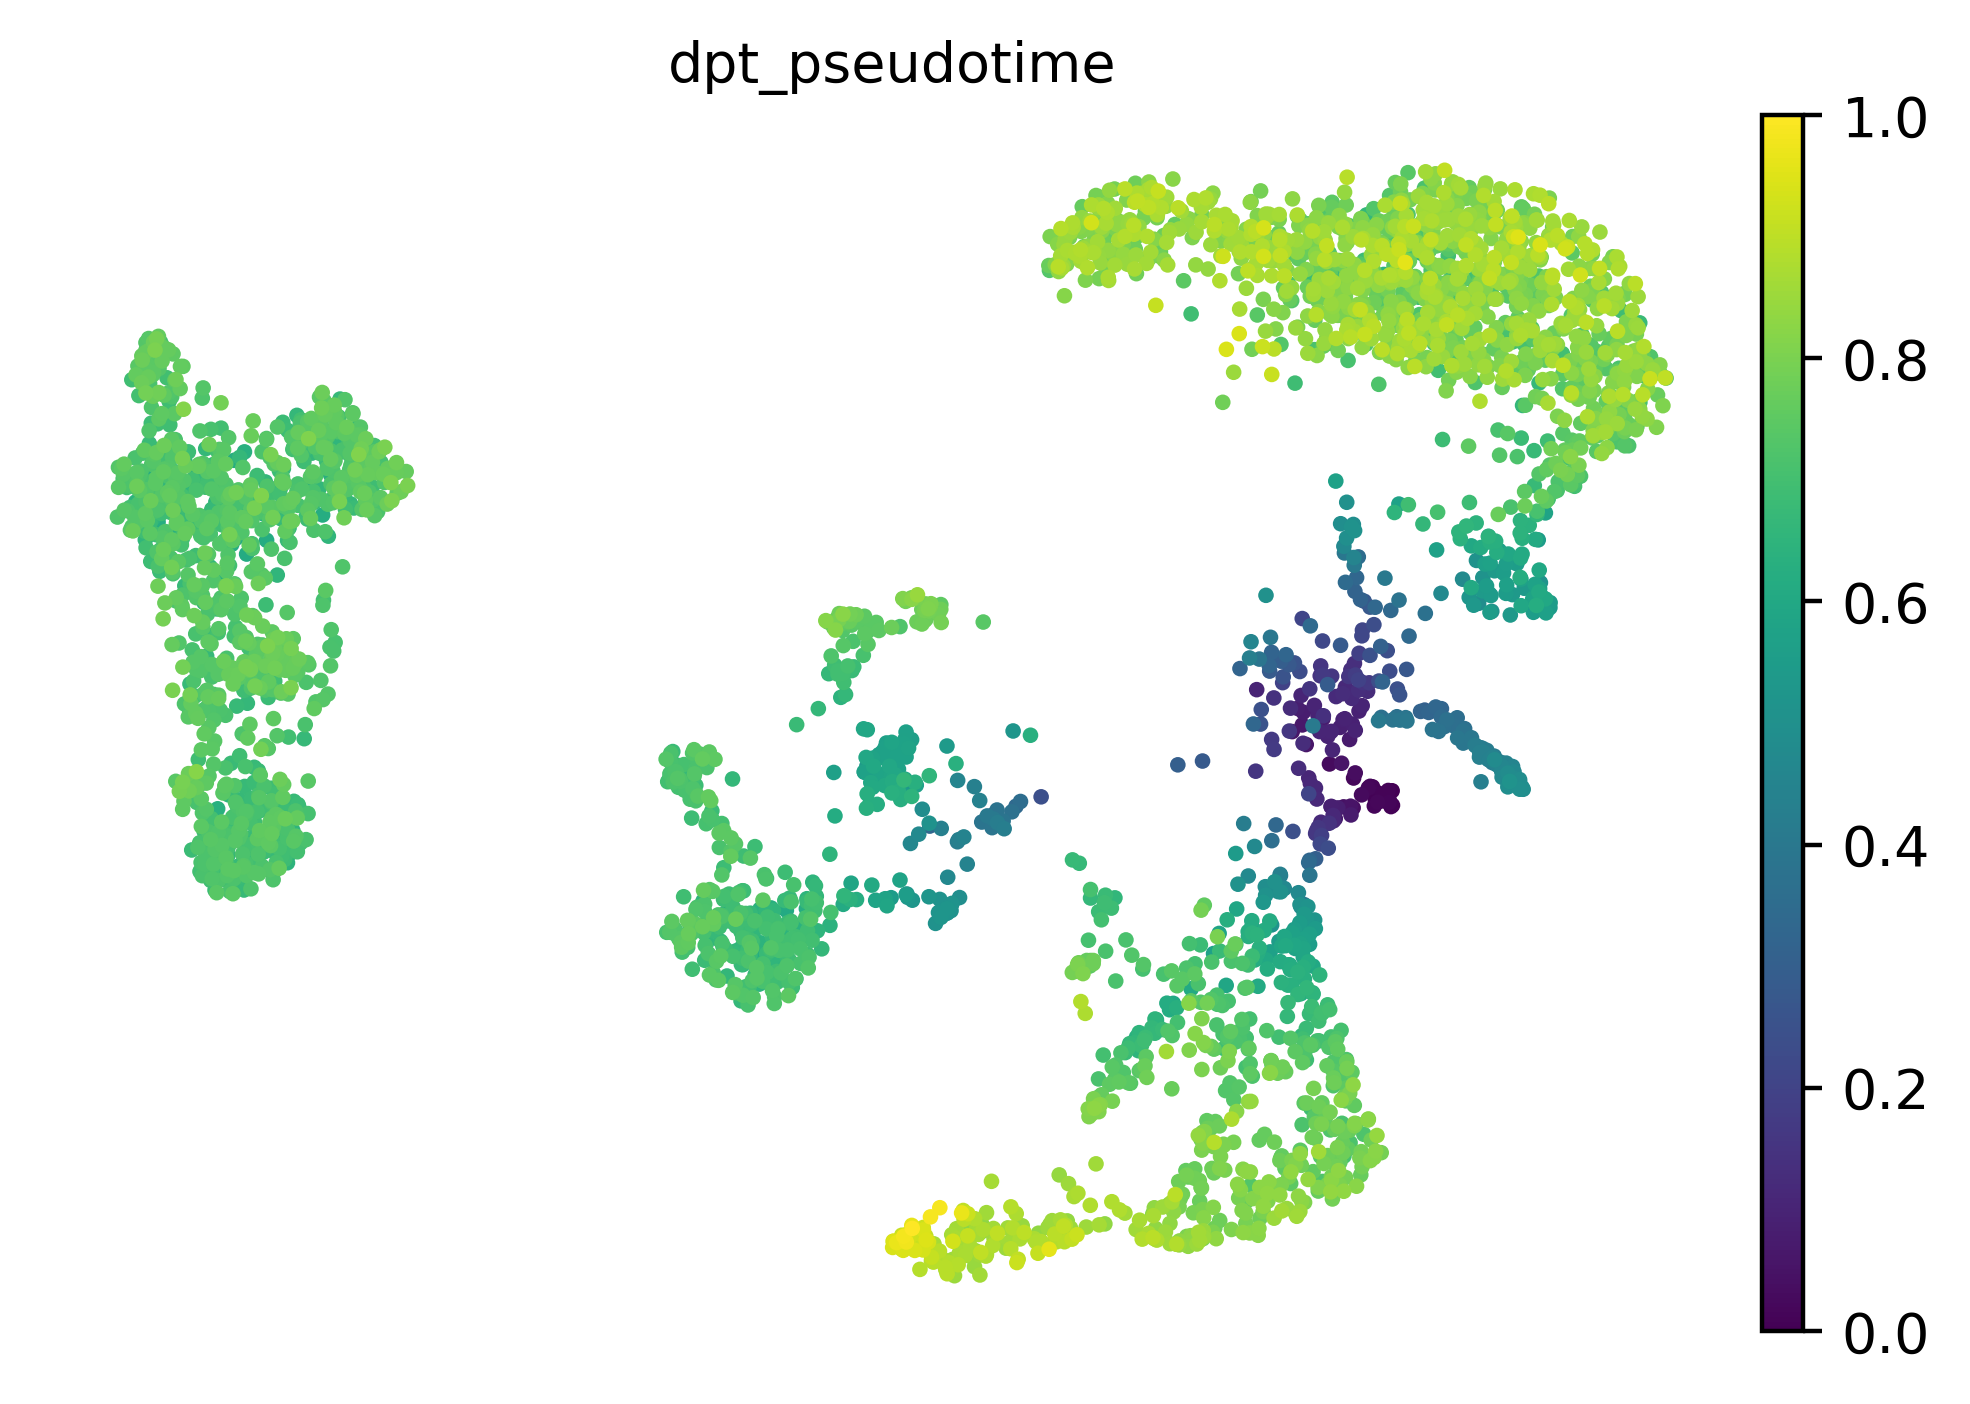

In [11]:
sc.pl.umap(adata_gex21,color = 'dpt_pseudotime')

# Subsetting 3 main lineages 

**B cell lineage**: HSC -> Lymph prog -> Transitional B -> Naive CD20+ B 

**Erythroid lineage**: HSC -> MK/E prog -> Proerythroblast -> Erythroblast -> Normoblast 

**Monocyte lineage**: HSC -> G/M prog -> CD14+ Mono -> CD16+ Mono

In [12]:
#subsetting the cell types in the main three lineages: B, Erythroid and Monocyte lineages
cell_types = ['HSC','G/M prog','CD14+ Mono','CD16+ Mono','MK/E prog','Proerythroblast','Erythroblast','Normoblast',
              'Lymph prog', 'Transitional B', 'Naive CD20+ B']

adata_gex11_subset = adata_gex11[adata_gex11.obs.cell_type.isin(cell_types)]

adata_gex12_subset = adata_gex12[adata_gex12.obs.cell_type.isin(cell_types)]

adata_gex21_subset = adata_gex21[adata_gex21.obs.cell_type.isin(cell_types)]

adata_gex24_subset = adata_gex24[adata_gex24.obs.cell_type.isin(cell_types)]

adata_gex36_subset = adata_gex36[adata_gex36.obs.cell_type.isin(cell_types)]

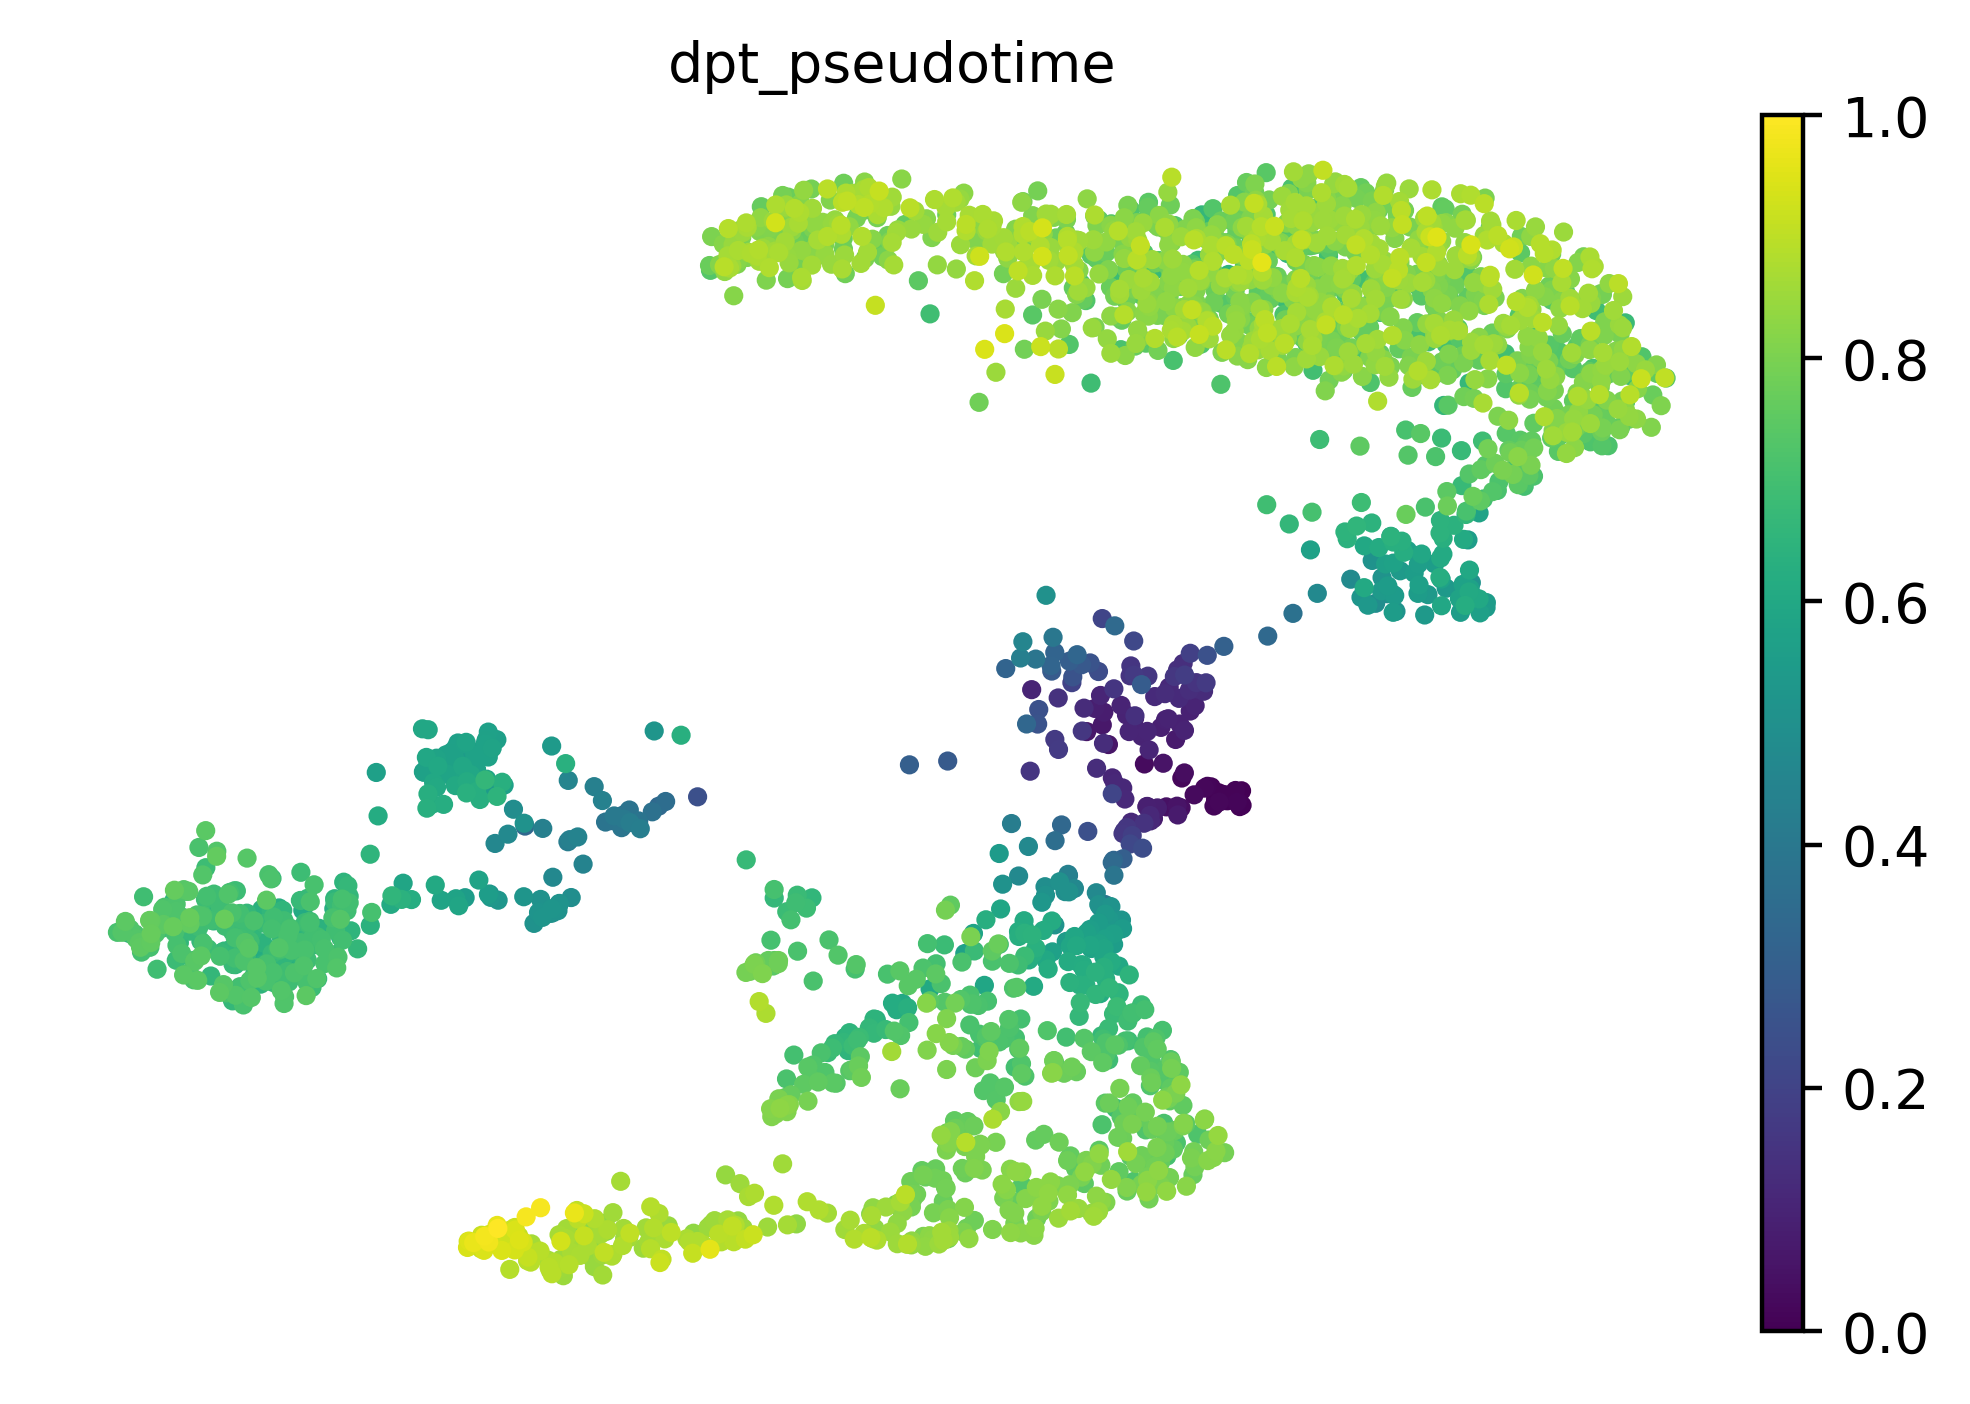

In [13]:
sc.pl.umap(adata_gex21_subset, color = 'dpt_pseudotime')

/home/icb/hananeh.aliee/miniconda3/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/icb/hananeh.aliee/miniconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


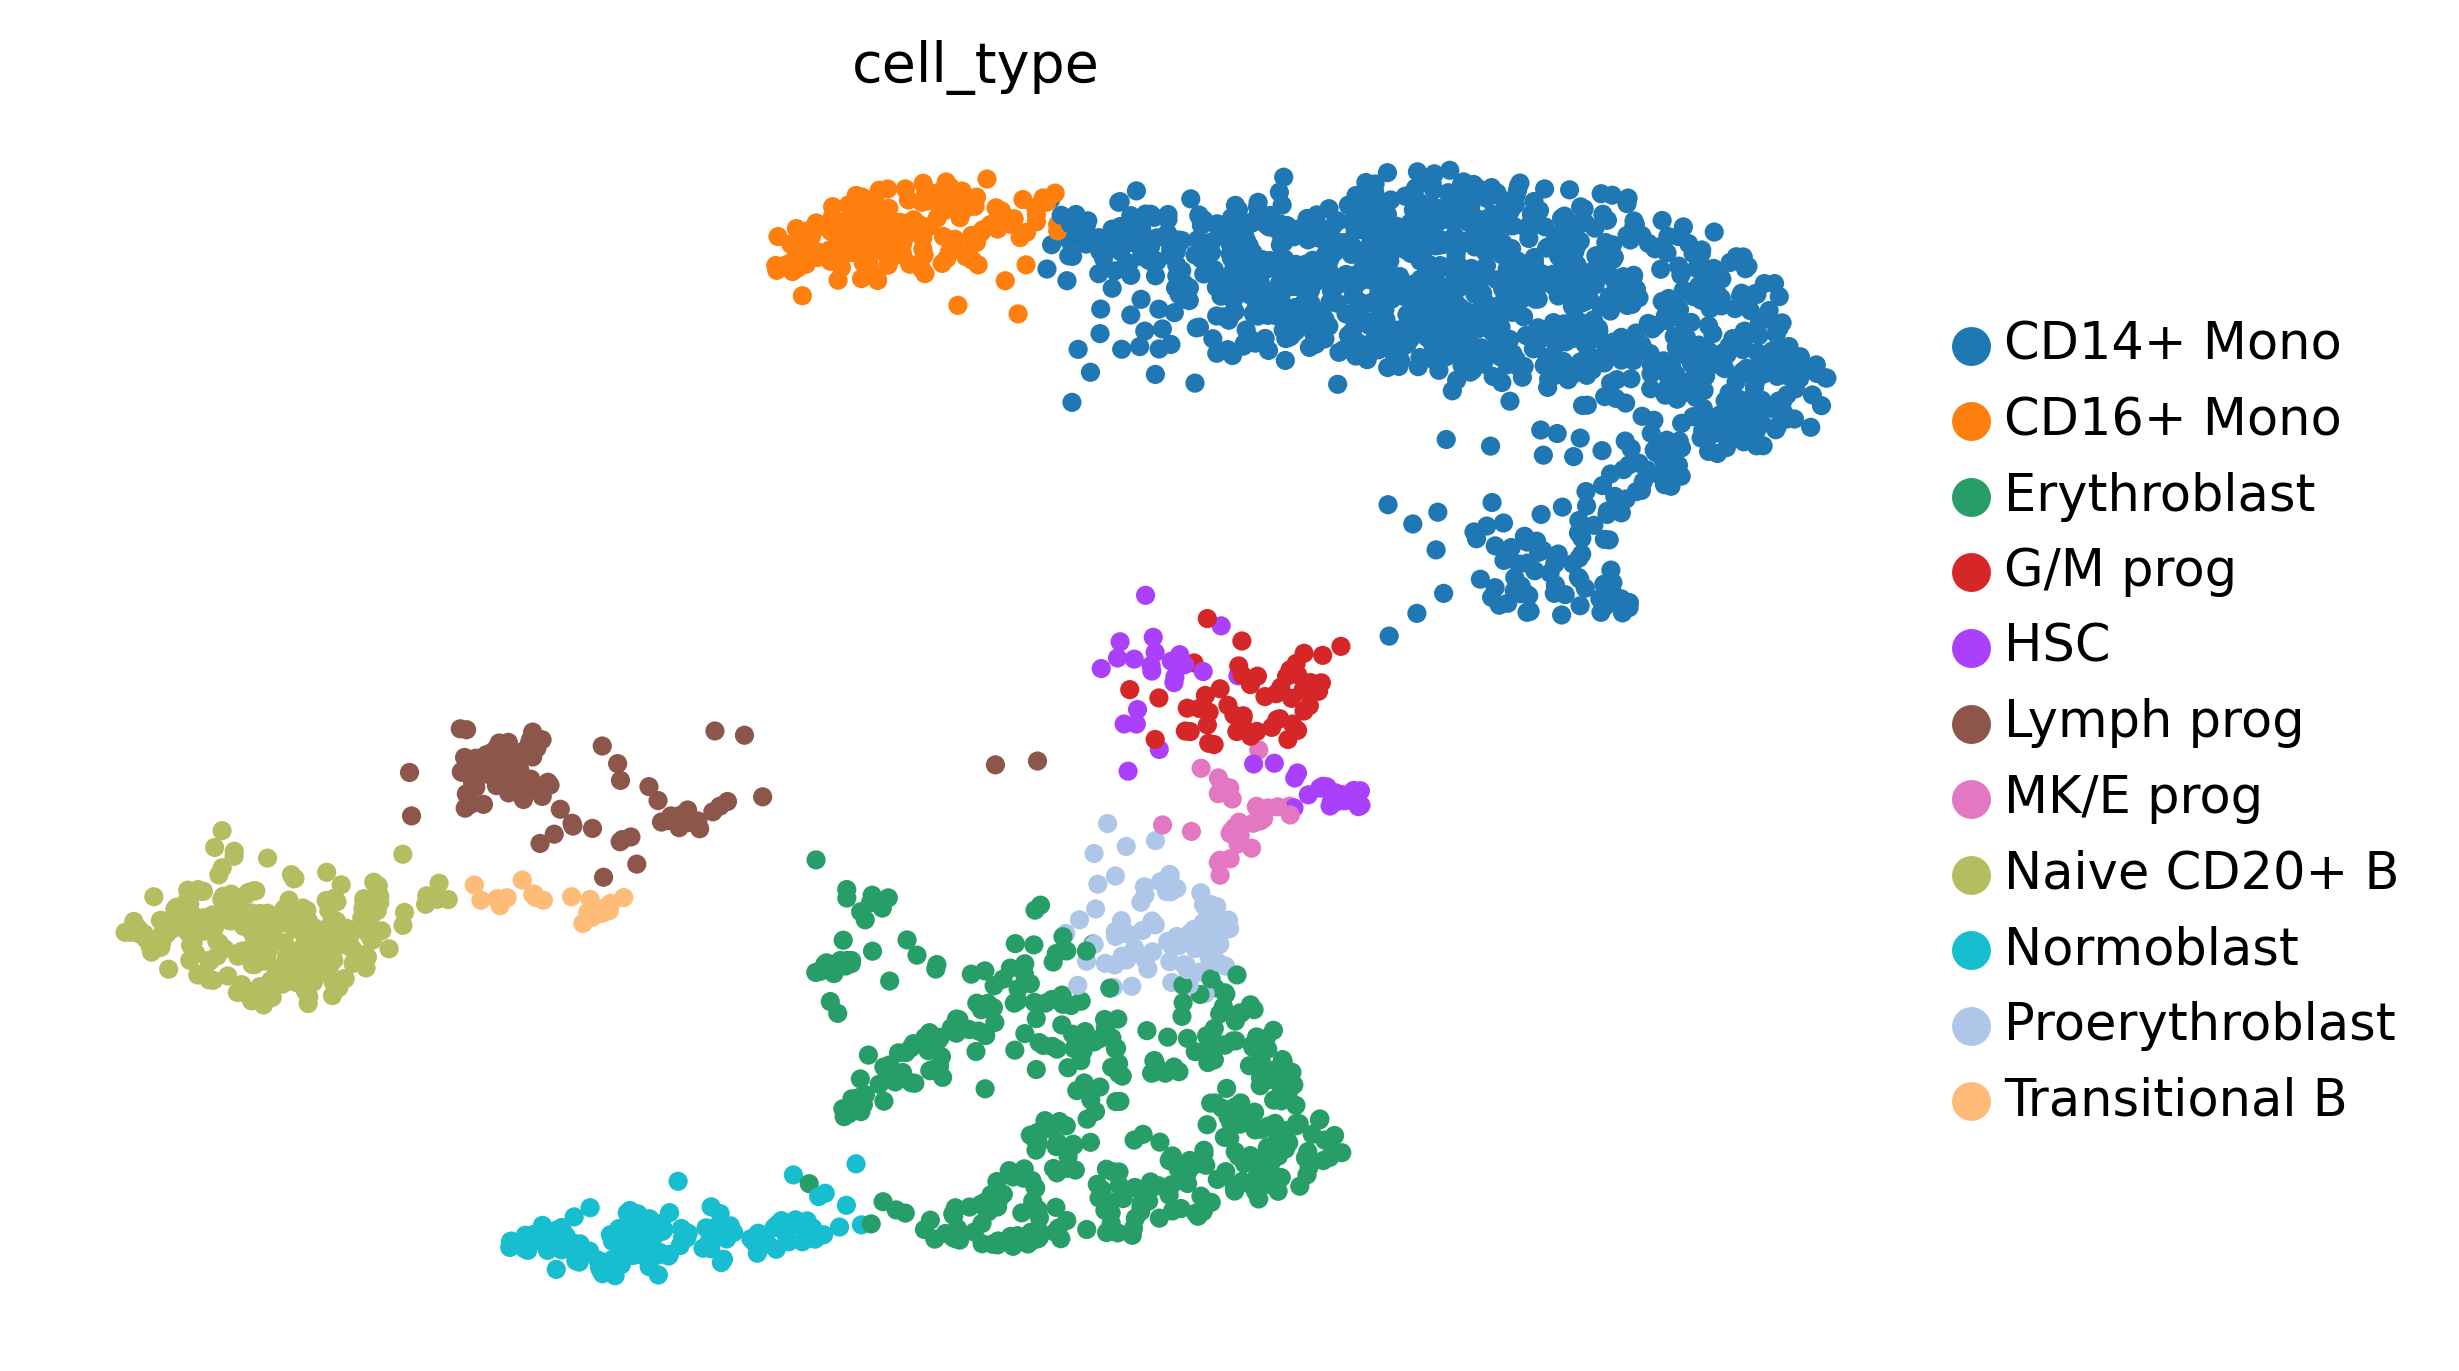

In [14]:
sc.pl.umap(adata_gex21_subset, color = 'cell_type')

# Subsetting highly variable genes

In [15]:
TFs_file = './data/TFs_Targets/'
cell_types = ['HSC','G_M prog','CD14+ Mono','CD16+ Mono',
              'MK_E prog','Proerythroblast','Erythroblast','Normoblast',
              'Lymph prog', 'Transitional B', 'Naive CD20+ B']

all_TFs = np.array([])
for cell in cell_types:
    TFs_cell = pd.read_csv(TFs_file+cell+"_matrix.csv.gz",sep=',',index_col=0,compression='gzip')
    all_TFs = np.append(TFs_cell.index,all_TFs)

In [16]:
adatas = [adata_gex11_subset,adata_gex12_subset,adata_gex21_subset,adata_gex24_subset,adata_gex36_subset]
for adata in adatas:
    sc.pp.highly_variable_genes(adata, layer='log_norm', n_top_genes=200)
    
genes = np.union1d(adata_gex12_subset[:,adata_gex12_subset.var.highly_variable].var_names,adata_gex21_subset[:,adata_gex21_subset.var.highly_variable].var_names)
genes = np.union1d(genes,adata_gex36_subset[:,adata_gex36_subset.var.highly_variable].var_names)
genes = np.union1d(genes,np.intersect1d(adata_gex36_subset.var_names,all_TFs))

/home/icb/hananeh.aliee/miniconda3/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/icb/hananeh.aliee/miniconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)
/home/icb/hananeh.aliee/miniconda3/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/icb/hananeh.aliee/miniconda3/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. 

In [17]:
adata_gex11_subset = adata_gex11_subset[:,genes]
adata_gex12_subset = adata_gex12_subset[:,genes] 
adata_gex21_subset = adata_gex21_subset[:,genes] 
adata_gex24_subset = adata_gex24_subset[:,genes]
adata_gex36_subset = adata_gex36_subset[:,genes] 

In [18]:
adata_gex11_subset.shape

(2693, 529)

# Printing the data

In [19]:
eryth_celltypes = ['HSC','MK/E prog','Proerythroblast','Erythroblast','Normoblast']
mono_celltypes = ['HSC','G/M prog','CD14+ Mono','CD16+ Mono']
B_celltypes = ['HSC','Lymph prog', 'Transitional B', 'Naive CD20+ B']

gex_11_eryth = adata_gex11_subset[adata_gex11_subset.obs.cell_type.isin(eryth_celltypes)]
gex_11_mono = adata_gex11_subset[adata_gex11_subset.obs.cell_type.isin(mono_celltypes)]
gex_11_B = adata_gex11_subset[adata_gex11_subset.obs.cell_type.isin(B_celltypes)]


gex_12_eryth = adata_gex12_subset[adata_gex12_subset.obs.cell_type.isin(eryth_celltypes)]
gex_12_mono = adata_gex12_subset[adata_gex12_subset.obs.cell_type.isin(mono_celltypes)]
gex_12_B = adata_gex12_subset[adata_gex12_subset.obs.cell_type.isin(B_celltypes)]



gex_21_eryth = adata_gex21_subset[adata_gex21_subset.obs.cell_type.isin(eryth_celltypes)]
gex_21_mono = adata_gex21_subset[adata_gex21_subset.obs.cell_type.isin(mono_celltypes)]
gex_21_B = adata_gex21_subset[adata_gex21_subset.obs.cell_type.isin(B_celltypes)]


gex_24_eryth = adata_gex24_subset[adata_gex24_subset.obs.cell_type.isin(eryth_celltypes)]
gex_24_mono = adata_gex24_subset[adata_gex24_subset.obs.cell_type.isin(mono_celltypes)]
gex_24_B = adata_gex24_subset[adata_gex24_subset.obs.cell_type.isin(B_celltypes)]


gex_36_eryth = adata_gex36_subset[adata_gex36_subset.obs.cell_type.isin(eryth_celltypes)]
gex_36_mono = adata_gex36_subset[adata_gex36_subset.obs.cell_type.isin(mono_celltypes)]
gex_36_B = adata_gex36_subset[adata_gex36_subset.obs.cell_type.isin(B_celltypes)]


In [20]:
import pandas as pd

eryth = pd.DataFrame(gex_11_eryth.X.todense(),
                     columns=gex_11_eryth.var_names,index= gex_11_eryth.obs.dpt_pseudotime)
eryth.to_csv('./data/trajectories/eryth_11_norm.csv',sep='\t')

mono = pd.DataFrame(gex_11_mono.X.todense(),
                     columns=gex_11_mono.var_names,index= gex_11_mono.obs.dpt_pseudotime)
mono.to_csv('./data/trajectories/mono_11_norm.csv',sep='\t')

B = pd.DataFrame(gex_11_B.X.todense(),
                     columns=gex_11_B.var_names,index= gex_11_B.obs.dpt_pseudotime)
B.to_csv('./data/trajectories/B_11_norm.csv',sep='\t')


In [21]:
eryth = pd.DataFrame(gex_12_eryth.X.todense(),
                     columns=gex_12_eryth.var_names,index= gex_12_eryth.obs.dpt_pseudotime)
eryth.to_csv('./data/trajectories/eryth_12_norm.csv',sep='\t')

mono = pd.DataFrame(gex_12_mono.X.todense(),
                     columns=gex_12_mono.var_names,index= gex_12_mono.obs.dpt_pseudotime)
mono.to_csv('./data/trajectories/mono_12_norm.csv',sep='\t')

B = pd.DataFrame(gex_12_B.X.todense(),
                     columns=gex_12_B.var_names,index= gex_12_B.obs.dpt_pseudotime)
B.to_csv('./data/trajectories/B_12_norm.csv',sep='\t')


In [22]:
eryth = pd.DataFrame(gex_21_eryth.X.todense(),
                     columns=gex_21_eryth.var_names,index= gex_21_eryth.obs.dpt_pseudotime)
eryth.to_csv('./data/trajectories/eryth_21_norm.csv',sep='\t')

mono = pd.DataFrame(gex_21_mono.X.todense(),
                     columns=gex_21_mono.var_names,index= gex_21_mono.obs.dpt_pseudotime)
mono.to_csv('./data/trajectories/mono_21_norm.csv',sep='\t')

B = pd.DataFrame(gex_21_B.X.todense(),
                     columns=gex_21_B.var_names,index= gex_21_B.obs.dpt_pseudotime)
B.to_csv('./data/trajectories/B_21_norm.csv',sep='\t')

In [23]:
eryth = pd.DataFrame(gex_24_eryth.X.todense(),
                     columns=gex_24_eryth.var_names,index= gex_24_eryth.obs.dpt_pseudotime)
eryth.to_csv('./data/trajectories/eryth_24_norm.csv',sep='\t')

mono = pd.DataFrame(gex_24_mono.X.todense(),
                     columns=gex_24_mono.var_names,index= gex_24_mono.obs.dpt_pseudotime)
mono.to_csv('./data/trajectories/mono_24_norm.csv',sep='\t')

B = pd.DataFrame(gex_24_B.X.todense(),
                     columns=gex_24_B.var_names,index= gex_24_B.obs.dpt_pseudotime)
B.to_csv('./data/trajectories/B_24_norm.csv',sep='\t')

In [24]:
eryth = pd.DataFrame(gex_36_eryth.X.todense(),
                     columns=gex_36_eryth.var_names,index= gex_36_eryth.obs.dpt_pseudotime)
eryth.to_csv('./data/trajectories/eryth_36_norm.csv',sep='\t')

mono = pd.DataFrame(gex_36_mono.X.todense(),
                     columns=gex_36_mono.var_names,index= gex_36_mono.obs.dpt_pseudotime)
mono.to_csv('./data/trajectories/mono_36_norm.csv',sep='\t')

B = pd.DataFrame(gex_36_B.X.todense(),
                     columns=gex_36_B.var_names,index= gex_36_B.obs.dpt_pseudotime)
B.to_csv('./data/trajectories/B_36_norm.csv',sep='\t')